# Working With Data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [8]:
import matplotlib as mpl
%matplotlib inline
mpl.style.use('clean') # this loads my personal plotting settings
# https://raw.githubusercontent.com/iamlemec/dotfiles/master/python/clean.mplstyle

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Pandas!

## DataFrame

In [16]:
s = pd.Series(np.random.rand(10), index=np.arange(10, 20))
s

10    0.316177
11    0.807541
12    0.626352
13    0.469601
14    0.094020
15    0.233255
16    0.264970
17    0.093685
18    0.551494
19    0.487469
dtype: float64

In [17]:
print(s.index)
print(s.values)

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')
[0.31617745 0.80754106 0.62635185 0.46960107 0.09401967 0.23325495
 0.26497023 0.09368458 0.55149377 0.48746915]


In [18]:
s.describe()

count    10.000000
mean      0.394456
std       0.234042
min       0.093685
25%       0.241184
50%       0.392889
75%       0.535488
max       0.807541
dtype: float64

In [19]:
df = pd.DataFrame({'ser1': s, 'ser2': np.random.randn(10)})
df.head()

,ser1,ser2
10,0.316177,0.476335
11,0.807541,-1.866164
12,0.626352,0.402320
13,0.469601,-0.794180
14,0.094020,-0.572794


In [20]:
df.describe()

,ser1,ser2
count,10.000000,10.000000
mean,0.394456,-0.025415
std,0.234042,1.077265
min,0.093685,-1.866164
25%,0.241184,-0.536824
50%,0.392889,-0.346449
75%,0.535488,0.457831
max,0.807541,1.620775


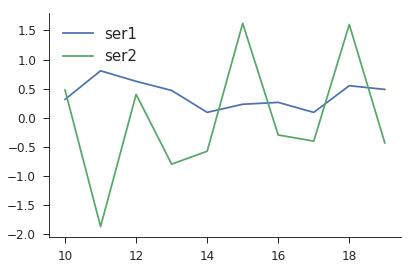

In [21]:
df.plot();

In [22]:
df['ser1']

10    0.316177
11    0.807541
12    0.626352
13    0.469601
14    0.094020
15    0.233255
16    0.264970
17    0.093685
18    0.551494
19    0.487469
Name: ser1, dtype: float64

In [23]:
df['ser1'] > 0.5

10    False
11     True
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
Name: ser1, dtype: bool

In [25]:
df1 = df[df['ser1']>0.5]
df1

,ser1,ser2
11,0.807541,-1.866164
12,0.626352,0.402320
18,0.551494,1.601368


In [26]:
df.query('ser1 > 0.5')

,ser1,ser2
11,0.807541,-1.866164
12,0.626352,0.402320
18,0.551494,1.601368


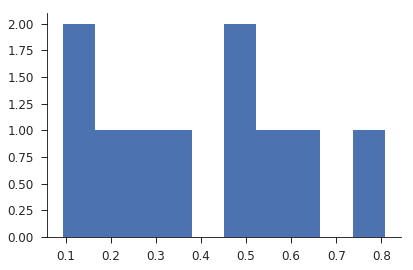

In [27]:
df['ser1'].hist(grid=False);

## Grouping Data

In [28]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block]+np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [29]:
df.head(10)

,block,value
0,3,0.475399
1,1,0.215199
2,3,0.363342
3,2,-0.035061
4,0,0.000809
5,1,0.230600
6,1,0.204918
7,1,0.191415
8,3,0.132119
9,3,0.387543


In [30]:
df.groupby('block').size()

block
0    25
1    34
2    25
3    16
dtype: int64

In [31]:
df.groupby('block')['value'].mean()

block
0    0.159078
1    0.185578
2    0.460354
3    0.352210
Name: value, dtype: float64

In [32]:
df.groupby('block')['value'].std()

block
0    0.189644
1    0.093270
2    0.494753
3    0.195417
Name: value, dtype: float64

In [33]:
df.groupby('block')['value'].apply(lambda x: np.mean(np.abs(x-np.mean(x))))

block
0    0.144624
1    0.068777
2    0.364701
3    0.146683
Name: value, dtype: float64

In [34]:
grp = df.groupby('block')['value']
pd.DataFrame({
    'mean': grp.mean(),
    'stdv': grp.std(),
    'absd': grp.apply(lambda x: np.mean(np.abs(x-np.mean(x))))
})

,mean,stdv,absd
block,,,
0,0.159078,0.189644,0.144624
1,0.185578,0.093270,0.068777
2,0.460354,0.494753,0.364701
3,0.352210,0.195417,0.146683


## Time Series

In [35]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [36]:
days = pd.date_range('2016-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [37]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(N))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')
df.head()

,price
date,
2016-01-01,-0.005855
2016-01-02,-0.005126
2016-01-03,-0.002856
2016-01-04,0.002190
2016-01-05,0.007233


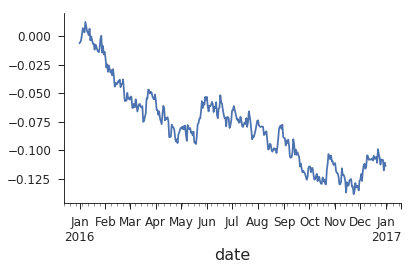

In [38]:
df['price'].plot();

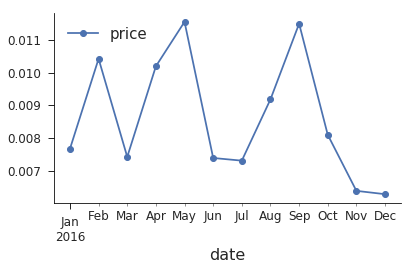

In [39]:
df.groupby(pd.TimeGrouper('MS')).std().plot(marker='o');

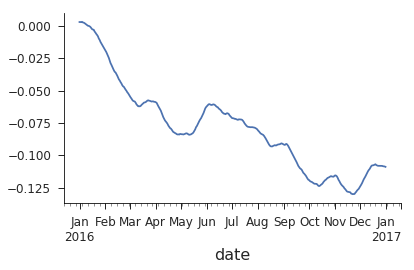

In [40]:
df.rolling(20, center=True, min_periods=5).mean().plot(legend=False);

## Transforming

In [41]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [42]:
days = pd.date_range('2006-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [43]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(len(days)))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')

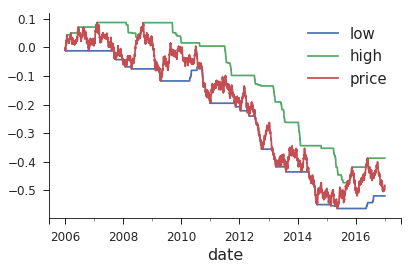

In [44]:
roll = df['price'].rolling(52*7, min_periods=1)
pd.DataFrame({
    'low' : roll.min(),
    'high': roll.max(),
    'price': df['price']
}).plot();

## Plotting

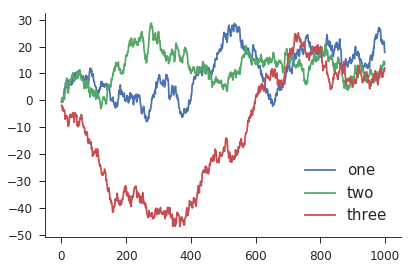

In [45]:
# good way to arrange plots
pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
}).plot();

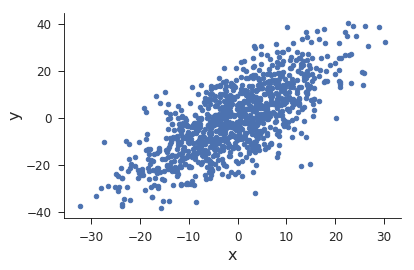

In [46]:
x = 10*np.random.randn(1000)
y = x + 10*np.random.randn(1000)
df = pd.DataFrame({
    'x': x,
    'y': y
})
df.plot.scatter(x='x', y='y');

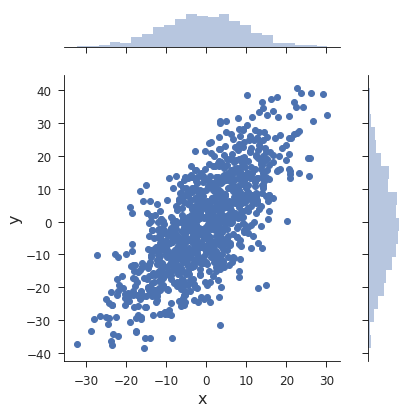

In [47]:
sns.jointplot('x', 'y', data=df);

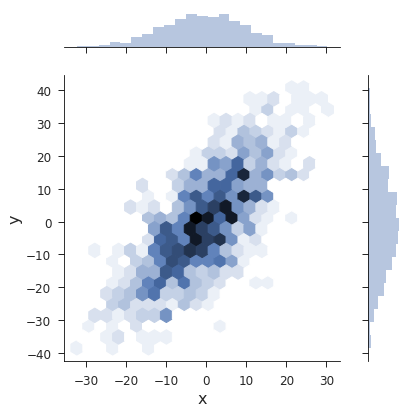

In [48]:
# kind in ['scatter', 'reg', 'resid', 'kde', 'hex']
sns.jointplot('x', 'y', kind='hex', data=df);

## Indexing

In [49]:
df = pd.DataFrame({
    'a': np.arange(10),
    'b': np.random.rand(10)
}, index=np.arange(10, 20))
df

,a,b
10,0,0.235327
11,1,0.469128
12,2,0.747915
13,3,0.310537
14,4,0.670937
15,5,0.500684
16,6,0.240811
17,7,0.949242
18,8,0.683673
19,9,0.335398


In [50]:
# slicing on index
df.loc[14]

a    4.000000
b    0.670937
Name: 14, dtype: float64

In [51]:
# slicing on location
df.iloc[4]

a    4.000000
b    0.670937
Name: 14, dtype: float64

In [52]:
# slicing on column
df['a']

10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
19    9
Name: a, dtype: int64

In [53]:
# selecting
df[df['a']>5]

,a,b
16,6,0.240811
17,7,0.949242
18,8,0.683673
19,9,0.335398


In [54]:
# advanced selecting
df[(df['a']>3)&(df['a']<8)]

,a,b
14,4,0.670937
15,5,0.500684
16,6,0.240811
17,7,0.949242


In [55]:
# selection mechanism
df['a'] > 3

10    False
11    False
12    False
13    False
14     True
15     True
16     True
17     True
18     True
19     True
Name: a, dtype: bool

In [56]:
# querying
df.query('a > 5')

,a,b
16,6,0.240811
17,7,0.949242
18,8,0.683673
19,9,0.335398


## Joining

In [57]:
mapp = pd.Series({x: 2*x for x in range(10)}, name='twox')
mapp

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
Name: twox, dtype: int64

In [58]:
init = pd.DataFrame({
    'ser': np.random.randint(10, size=100),
    'val': np.random.rand(100)
})
init.head()

,ser,val
0,7,0.291028
1,8,0.612223
2,8,0.346517
3,6,0.506216
4,5,0.883583


In [59]:
final = init.join(mapp, on='ser')
final.head()

,ser,val,twox
0,7,0.291028,14
1,8,0.612223,16
2,8,0.346517,16
3,6,0.506216,12
4,5,0.883583,10


In [61]:
final['check'] = final['twox'] == 2*final['ser']
final.head()

,ser,val,twox,check
0,7,0.291028,14,True
1,8,0.612223,16,True
2,8,0.346517,16,True
3,6,0.506216,12,True
4,5,0.883583,10,True


In [62]:
print(final['check'].all())

True


## Reshaping

In [63]:
df = pd.DataFrame({
    'row': np.arange(100, 110),
    'src': np.random.randint(10, size=10),
    'dst': np.random.randint(10, size=10),
    'wgt': np.random.rand(10)
})
df

,row,src,dst,wgt
0,100,5,8,0.364162
1,101,8,2,0.056091
2,102,0,2,0.289792
3,103,1,2,0.294293
4,104,7,2,0.931409
5,105,7,3,0.824906
6,106,9,5,0.102922
7,107,4,5,0.066133
8,108,5,2,0.063988
9,109,4,6,0.934913


In [64]:
# go from wide to long data (and melt your brain in the process!)
df1 = pd.melt(df, id_vars=['row', 'wgt'], value_vars=['src', 'dst'], value_name='id')
df1 = df1.sort_values(by=['row', 'variable'])
df1

,row,wgt,variable,id
10,100,0.364162,dst,8
0,100,0.364162,src,5
11,101,0.056091,dst,2
1,101,0.056091,src,8
12,102,0.289792,dst,2
2,102,0.289792,src,0
13,103,0.294293,dst,2
3,103,0.294293,src,1
14,104,0.931409,dst,2
4,104,0.931409,src,7


In [65]:
nodes = df1.groupby('id')
pd.DataFrame({
    'links': nodes.size(),
    'stength': nodes['wgt'].sum()
})

,links,stength
id,,
0,1,0.289792
1,1,0.294293
2,5,1.635573
3,1,0.824906
4,2,1.001045
5,4,0.597204
6,1,0.934913
7,2,1.756315
8,2,0.420253


In [68]:
# total enumeration
df1 = df.stack().rename_axis(['idx', 'var']).rename('val').reset_index()
df1.head(10)

,idx,var,val
0,0,row,100.000000
1,0,src,5.000000
2,0,dst,8.000000
3,0,wgt,0.364162
4,1,row,101.000000
5,1,src,8.000000
6,1,dst,2.000000
7,1,wgt,0.056091
8,2,row,102.000000
9,2,src,0.000000


## Networks

In [69]:
import networkx as nx

In [70]:
df = pd.DataFrame({
    'src': np.random.randint(10, size=20),
    'dst': np.random.randint(10, size=20),
    'wgt': np.random.exponential(size=20)
})
df = df.drop_duplicates(subset=['src', 'dst'])
df = df.query('src != dst')
df

,src,dst,wgt
0,5,1,1.905164
1,8,2,0.257350
2,4,2,0.130922
4,4,1,0.144727
5,1,9,0.228970
6,1,6,0.502144
7,4,6,0.675034
9,5,3,0.832089
10,7,1,0.714093
11,1,8,1.150638


In [71]:
G = nx.Graph()
G.add_nodes_from(np.arange(10))
G.add_weighted_edges_from([(x['src'], x['dst'], x['wgt']) for i, x in df.iterrows()])
# G.add_weighted_edges_from(df[['src', 'dst', 'wgt']].values) # equivalent
G

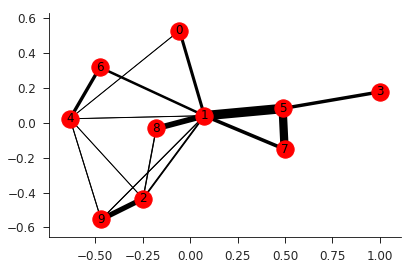

In [72]:
edgewidth = [5*d['weight'] for (u,v,d) in G.edges(data=True)]
pos = nx.spring_layout(G, iterations=50)
nx.draw_networkx(G, pos);
nx.draw_networkx_edges(G, pos, width=edgewidth);

In [73]:
nx.centrality.eigenvector.eigenvector_centrality(G, weight='weight')

{0: 0.11481735839334263,
 1: 0.5860766732851215,
 2: 0.1116996805872839,
 3: 0.12664079585837787,
 4: 0.06217840611597422,
 5: 0.596636687436964,
 6: 0.10427016647603453,
 7: 0.4357989797202728,
 8: 0.21802011516590802,
 9: 0.08154212090491626}

## Input/Output

In [685]:
df = pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
})
df.to_csv('test.csv', index=False)

In [686]:
df = pd.read_csv('test.csv')
df.head()

,one,two,three
0,1.010854,-0.603610,0.669119
1,0.558358,-0.437410,-0.271413
2,1.073947,-0.049016,-0.250580
3,-0.056853,-0.476332,-0.466481
4,0.881553,-0.047638,-0.350192


Can also use the many `pd.DataFrame.to_*` and `pd.read_*` function where `*` is one of:
- csv
- excel
- json
- html
- latex
- stata
- sql

## External Data

In [687]:
import pandas_datareader as pdr

In [688]:
emp = pdr.fred.FredReader(['UNRATE', 'LNS12300060'], start='1948-01-01').read()
emp = emp.rename(columns={'UNRATE': 'unemp', 'LNS12300060': 'empop'}).rename_axis('date')
emp.head()

,unemp,empop
date,,
1948-01-01,3.4,62.6
1948-02-01,3.8,62.7
1948-03-01,4.0,62.6
1948-04-01,3.9,62.9
1948-05-01,3.5,62.5


In [689]:
# detrender
def detrend(s):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    ret = smf.ols(f'{name} ~ 1 + year', data=df).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

In [690]:
# detrend poly!
def detrendn(s, deg=1):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    df['zyear'] = df['year'] - df['year'].min() + 1
    reg = []
    for n in range(deg+1):
        ds = f'year{n}'
        df[ds] = df['zyear']**n
        reg.append(ds)
    reg = f'{name} ~ ' + ' + '.join(reg)
    ret = smf.ols(reg, data=df).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

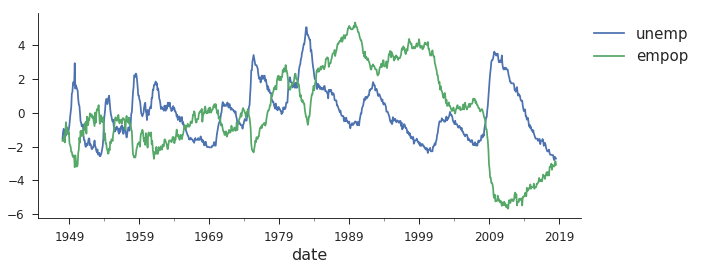

In [691]:
emp.apply(detrend).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

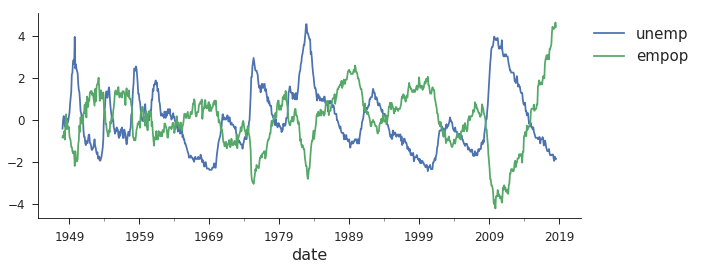

In [692]:
emp.apply(lambda s: detrendn(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [693]:
# let's not reinvent the wheel
def detrendn1(s, deg=1):
    year = s.index.year
    zyear = year - year.min()
    coef = np.polyfit(zyear, s, deg)
    vals = np.polyval(coef, zyear)
    pred = pd.Series(vals, index=s.index, name=s.name)
    return s - pred

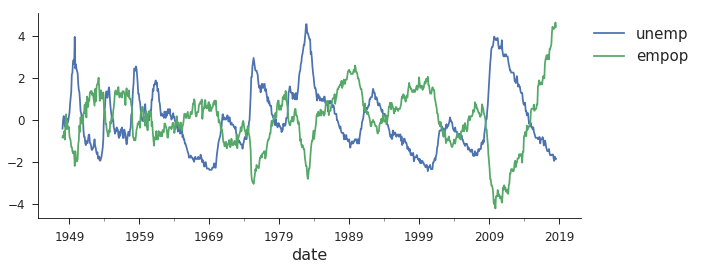

In [694]:
emp.apply(lambda s: detrendn1(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

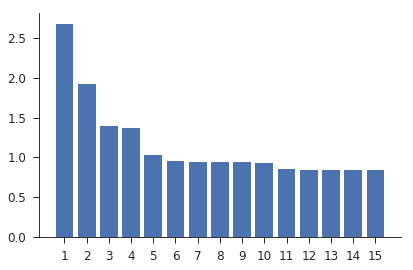

In [695]:
dvec = np.arange(1, 15+1)
plt.bar(dvec, [np.std(detrendn1(emp['empop'], deg=d)) for d in dvec]);
plt.xticks(dvec);

# Regressions

## Basic

In [696]:
N = 100
x = np.random.randn(N)
y = 3*np.random.randn(N)
z = 1 + 2*x + 3*y + 4*x*y + np.random.randn(N)
df = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z
})

In [697]:
ret = smf.ols('z ~ 1 + x + y', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     30.39
Date:                Mon, 24 Sep 2018   Prob (F-statistic):           5.65e-11
Time:                        00:18:39   Log-Likelihood:                -404.15
No. Observations:                 100   AIC:                             814.3
Df Residuals:                      97   BIC:                             822.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6111      1.411      1.850      0.067      -0.190       5.412
x             -0.1936      1.418     -0.136      0.892      -3.009       2.622
y              3.8323      0.495      7.742      0.000       2.850       4.815
==============================================================================
Omnibus:                       62.711   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.362
Skew:                           2.011   Prob(JB):                     3.02e-72
Kurtosis:                      10.929   Cond. No.                         3.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [698]:
ret.params

Intercept    2.611126
x           -0.193564
y            3.832308
dtype: float64

In [699]:
ret = smf.ols('z ~ 1 + x*y', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.083e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):          2.65e-121
Time:                        00:18:41   Log-Likelihood:                -137.12
No. Observations:                 100   AIC:                             282.2
Df Residuals:                      96   BIC:                             292.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7501      0.099      7.569      0.000       0.553       0.947
x              1.8555      0.100     18.597      0.000       1.657       2.054
y              2.9598      0.035     84.564      0.000       2.890       3.029
x:y            3.9973      0.028    141.183      0.000       3.941       4.054
==============================================================================
Omnibus:                        0.152   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.334
Skew:                           0.018   Prob(JB):                        0.846
Kurtosis:                       2.719   Cond. No.                         3.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

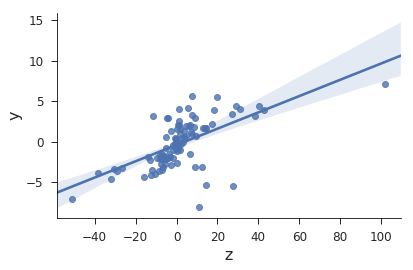

In [700]:
sns.regplot('z', 'y', data=df);

## Categorical

In [701]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block] + np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [702]:
ret = smf.ols('value ~ 0 + C(block)', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     6.192
Date:                Mon, 24 Sep 2018   Prob (F-statistic):           0.000684
Time:                        00:18:44   Log-Likelihood:                -1.7664
No. Observations:                 100   AIC:                             11.53
Df Residuals:                      96   BIC:                             21.95
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C(block)[0]     0.0996      0.050      1.981      0.050      -0.000       0.199
C(block)[1]     0.2298      0.048      4.837      0.000       0.135       0.324
C(block)[2]     0.2795      0.048      5.777      0.000       0.183       0.376
C(block)[3]     0.4193      0.056      7.461      0.000       0.308       0.531
==============================================================================
Omnibus:                       18.740   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.255
Skew:                          -0.543   Prob(JB):                     1.65e-12
Kurtosis:                       6.441   Cond. No.                         1.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [703]:
ret.params - cmean

C(block)[0]   -0.000409
C(block)[1]    0.029764
C(block)[2]   -0.020520
C(block)[3]    0.019333
dtype: float64

In [704]:
stderr_reg = np.sqrt(ret.cov_params().values.diagonal())
stderr_rob = np.sqrt(ret.cov_HC0.diagonal())

## Bootstrapping

In [705]:
def gen_block_data(N, cmean, cvars):
    cmean = np.array(cmean)
    cvars = np.array(cvars)
    block = np.random.randint(len(cmean), size=N)
    value = cmean[block] + np.random.randn(N)*cvars[block]
    return pd.DataFrame({
        'block': block,
        'value': value
    })

In [706]:
N = 100
K = 1000
cmean = [0.1, 0.2, 0.3, 0.4]
cvars = [0.2, 0.1, 0.5, 0.2]
mygen = lambda: gen_block_data(N, cmean, cvars)
myeqn = 'value ~ 0 + C(block)'
res = pd.DataFrame({i: smf.ols(myeqn, data=mygen()).fit().params for i in range(K)}).T
res.columns = ['b0', 'b1', 'b2', 'b3']
stderr_bsp = res.std().values

In [707]:
pd.DataFrame({
    'stderr_reg': stderr_reg,
    'stderr_rob': stderr_rob,
    'stderr_bsp': stderr_bsp
}).T

,0,1,2,3
stderr_reg,0.050272,0.047503,0.048375,0.056206
stderr_rob,0.030344,0.018286,0.081316,0.031917
stderr_bsp,0.040244,0.020032,0.104329,0.038125


# Machine Learning

In [484]:
import tensorflow as tf

## Regression

$$\log(\mathcal{L}) = -\frac{N}{2}\log(2\pi)-N\log(\sigma)-\sum_i \frac{1}{2}\left(\frac{y_i-\beta x_i}{\sigma}\right)^2$$

In [71]:
N = 1000
dat_x = 10*np.random.randn(N)
dat_y = 1 + 2*dat_x + 3*np.random.randn(N)

In [72]:
x = tf.placeholder(tf.float64, name='x')
y = tf.placeholder(tf.float64, name='y')
data = {x: dat_x, y: dat_y}

In [73]:
beta0 = tf.Variable(2.0, dtype=tf.float64, name='beta0')
beta1 = tf.Variable(1.0, dtype=tf.float64, name='beta1')

In [74]:
yhat = beta0 + beta1*x
mse = tf.reduce_mean((y-yhat)**2)
sigma = (N/(N-1))*tf.sqrt(mse)

In [75]:
init = tf.global_variables_initializer()
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
minn = opt.minimize(mse)

In [76]:
with tf.Session().as_default():
    init.run()
    for i in range(1000):
        minn.run(feed_dict=data)
    print(f'beta0 = {beta0.eval()}')
    print(f'beta1 = {beta1.eval()}')
    print(f'sigma = {sigma.eval(feed_dict=data)}')

beta0 = 1.054179186150941
beta1 = 2.008352125363799
sigma = 3.0075219369534008


In [77]:
df = pd.DataFrame({
    'x': dat_x,
    'y': dat_y
})
ret = smf.ols('y ~ 1 + x', data=df).fit()
print(f'beta0 = {ret.params.iloc[0]}')
print(f'beta1 = {ret.params.iloc[1]}')
print(f'sigma = {np.sqrt(ret.mse_resid)}')

beta0 = 1.0541791845589312
beta1 = 2.0083521253627317
sigma = 3.0075234437275404


## Text Analysis

In [78]:
import re
import json
import time
import html
import sklearn.feature_extraction.text as fe
from sklearn.model_selection import train_test_split
import tflearn
from tflearn.data_utils import to_categorical

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


In [79]:
def clean_tweet(text):
    text = text.lower().strip()

    # odd subs
    text = re.sub(r'’', '\'', text)
    text = re.sub(r'—', '-', text)

    # urls
    text = re.sub(r'\bhttps?://[\S]*\b', r' ', text)
    text = html.unescape(text)

    # acronyms
    text = re.sub(r'\.{2,}', r'.', text)
    text = re.sub(r'(\S)\.(\S)\.', r'\1\2', text)
    text = re.sub(r'(\S)\.(\S)\.(\S)\.', r'\1\2\3', text)

    # control chars
    text = re.sub(r'([!\.&,])', r' \1 ', text)
    text = re.sub(r'[^ a-z0-9#@!\.&,\']', r' ', text)
    text = re.sub(r'[0-9\']', r'', text)

    # clean up
    text = re.sub(r' {2,}', r' ', text)
    text = text.strip()

    # combine
    return text

In [80]:
tweets16 = pd.read_json('~/data/trump_tweets/condensed_2016.json')
tweets17 = pd.read_json('~/data/trump_tweets/condensed_2017.json')
tweets = pd.concat([tweets16, tweets17])

rt_mark = tweets['text'].apply(lambda s: s.startswith('"@') or s.startswith('rt'))
tweets = tweets[(~tweets['is_retweet'])&(~rt_mark)&tweets['in_reply_to_user_id_str'].isnull()]
tweets['isource'] = tweets['source'].map({'Twitter for iPhone': 0, 'Twitter for Android': 1})
tweets = tweets.dropna(subset=['isource'])
tweets['isource'] = tweets['isource'].astype(np.int)
tweets['clean_text'] = tweets['text'].apply(clean_tweet)

In [83]:
corpus = list(tweets['clean_text'])
categ = to_categorical(tweets['isource'].values, 2)
print(len(corpus))

3460


In [84]:
tfidf = fe.TfidfVectorizer()
counts = tfidf.fit_transform(corpus).todense()
n_twt, n_wrd = counts.shape

In [92]:
(train_x, valid_x, train_y, valid_y) = train_test_split(counts, categ, test_size=0.1)

In [93]:
def generate_nn(n_wrd, nn_size, dropout):
    net = tflearn.input_data([None, n_wrd])
    net = tflearn.fully_connected(net, nn_size, activation='softmax')
    net = tflearn.dropout(net, 1-dropout)
    net = tflearn.fully_connected(net, 2, activation='softmax')
    net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')
    model = tflearn.DNN(net, clip_gradients=0.0, tensorboard_verbose=1,
        tensorboard_dir='/tmp/tflearn_logs/neural', checkpoint_path='checkpoints/neural')
    return model

In [94]:
model = generate_nn(n_wrd, 128, 0.5)

In [95]:
run_id = 'neural_%s' % time.strftime('%Y_%m%d_%H%M')
model.fit(train_x, train_y, validation_set=(valid_x, valid_y),
          show_metric=True, n_epoch=25, run_id=run_id)

Training Step: 1224  | total loss: 0.36626 | time: 2.180s
| Adam | epoch: 025 | loss: 0.36626 - acc: 0.8953 -- iter: 3072/3114
Training Step: 1225  | total loss: 0.36943 | time: 3.230s
| Adam | epoch: 025 | loss: 0.36943 - acc: 0.8901 | val_loss: 0.45805 - val_acc: 0.8035 -- iter: 3114/3114
--
INFO:tensorflow:/Users/doug/work/data_science/checkpoints/neural-1225 is not in all_model_checkpoint_paths. Manually adding it.


In [96]:
valid_prob = model.predict(valid_x)
valid_pred = np.array(valid_prob).argmax(axis=1)
valid_bin = np.array(valid_y).argmax(axis=1)
valid_acc = (valid_bin==valid_pred).mean()

In [98]:
all_prob = model.predict(counts)
android_prob = all_prob[:, 1]
androidy = list(tweets['text'].iloc[android_prob.argsort()[::-1]])